<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/NeuralNetworks/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Model

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Load the pre-processed dataset
data = pd.read_csv('bank-scaled.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = (data['y'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=30, batch_size=32, verbose=0)

# Training Report
y_train_pred = (model.predict(X_train_balanced) > 0.5).astype(int)
print("Training Set Report:")
print(classification_report(y_train_balanced, y_train_pred))

# Testing Report
y_test_pred = (model.predict(X_test) > 0.5).astype(int)
print("Testing Set Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

1501/1501 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Set Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     24008
           1       0.94      0.93      0.94     24008

    accuracy                           0.94     48016
   macro avg       0.94      0.94      0.94     48016
weighted avg       0.94      0.94      0.94     48016

636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Testing Set Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     10289
           1       0.88      0.88      0.88     10037

    accuracy                           0.88     20326
   macro avg       0.88      0.88      0.88     20326
weighted avg       0.88      0.88      0.88     20326



###Visualization

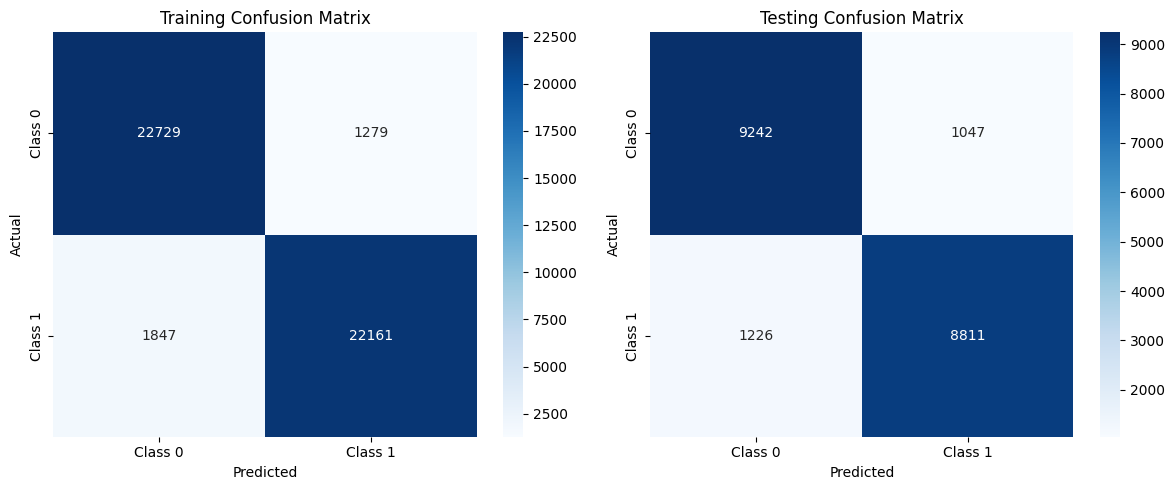

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training data
train_cm = confusion_matrix(y_train_balanced, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix for training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Visualize confusion matrix for testing data
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
